# Neural Networks: The Big Guns


In [ ]:
from matplotlib import pyplot as plt

config = {
'axes.spines.right': False,
'axes.spines.top': False,
'axes.edgecolor': '.4',
'axes.labelcolor': '.0',
'axes.titlesize': 'large',
'axes.labelsize': 'large',
'figure.autolayout': True,
'figure.figsize': (8, 5),
'font.family': ['serif'],
'font.size': 11.0,
'grid.linestyle': '--',
'legend.facecolor': '.9',
'legend.frameon': True,
'legend.fontsize': 'medium',
'savefig.transparent': True,
'text.color': '.0',
'xtick.labelsize': 'medium',
'ytick.labelsize': 'medium',
}

plt.style.use(['seaborn-v0_8-whitegrid', 'seaborn-v0_8-paper', 'seaborn-v0_8-muted', config])

## Deep Learning

Linear and logistic regression might work well on problems where there aren't an excessive amount of variables and there is a somewhat clean way to relate them to the data. If we'd used as inputs not *data* about the flowers but actual *pictures* of the flowers, our softmax algorithm back there would have failed pretty hard. Even if we somehow managed to get it to fit the training data, there'd be a yet tinier chance that it would generalize to the testing data.

But it would undeniably be nice to have something that could do that, but... how would we even go about making it? If we could get something that could get bigger patterns in the picture and turn them into something more edible for softmax, that would be a nice start. However, let's hold that thought for a while, and talk about something else.

### The Perceptron

The Perceptron is a small generalization of the algorithms we've been doing so far. It is a single unit that contains many weights, and when given an input, outputs a linear combination of the weights and the inputs. However, it doesn't do just that: after the summation, it will apply an *activation function*, which is supposed to indicate how 'activated' the Perceptron is with that input. In the binary classification case, we used the sigmoid as our activation function. In linear regression, we don't really apply any function after the summation, so we can say the activation function there is simply the identity function.

In the case of softmax, our output wasn't a single real number, but the same principle applied, we made the summation of inputs and weights, and then applied the softmax over that.

**note:** the weight that gets multiplied with 1 has a special name. It is called the *bias*.

![perceptron](img/perceptron.avif)

Now why is this relevant? While a single perceptron can be decently powerful (as we've seen with linear, logistic, and softmax), it can't really do the image classification task we thought about earlier. Well, it can't do that *alone*, that is. But what if we chain multiple perceptrons together?

![multi-layer perceptron with one hidden layer](img/mlp.svg)

It might be surprising, but this can actually be very, *very* powerful. You might say "duh, you add a lot of a thing, you make it more powerful" - but that wouldn't be quite right. These *networks* of perceptrons are actually obscenely good; better than you'd think by merely looking at the sum of their parts. Just so you have an idea, adding a *single* intermediate layer (which we call *hidden layer* of perceptrons) between our inputs and outputs is [mathematically proven](https://en.wikipedia.org/wiki/Universal_approximation_theorem) to be enough to locally approximate any continuous function, with a condition, that I'll specify in a just a second. Before that, let's go on briefly about *how* might that even be possible.

Well, the first thing we should notice is that it isn't always possible. If your activation functions are all linear, then the entire network could be compressed into a single linear function, undoing the whole point of having many layers. That would be bad, since now we can't replicate non-linear behavior. So you'll generally see people saying that your activation function needs to be "non-linear." And that kind of makes sense - if your function is crazy enough, you can probably put together piles of it to approximate anything you want, even if the way you combine them is just via scaling, shifting, and summing (notice that with linear functions this would just yield more linear functions).

**note:** by linear here we really mean *affine*. So a linear combination of the inputs + a constant.

Though, "non-linear" is a bit innacurate, as the theorem's requirements are that the activation function is continuous, but *not* a polynomial (after all, composing, scaling, and shifting polynomials gets you more polynomials). But, that's not really important. Still, all we need is for our function to be crazy "enough" that it can model whatever non-linear (but continuous) phenomenon.

**TO-DO:** add more examples of activation functions. tanh, ReLU, etc.

### Multi-Layer Perceptron

![multi-layer perceptron with many hidden layers](img/mlp.png)

The theorem, however, doesn't guarantee anything about how many perceptrons we'll need in that hidden layer. That number could be *huge*. So often times we'll use *many* hidden layers with not too many neurons, which save lots of computation. This means we generally prefer to increase the *depth* of the network, over its *width*. That's where the whole *deep learning* thing comes from! Adding depth to these networks can make them *incredibly* good. Another, cooler (at least in my opinion) name for these neural networks made up of perceptrons is *Multi-Layer Perceptrons*. But there is yet an issue to resolve: how do we even get a decent model like we were doing before?

### Optimization

The idea is essentially the same. We are still going to use gradient descent, but we have to be a bit smart about it. We'll still have some cost function $\mathcal J$ (which will depend on the purpose of the model), and we'll try to minimize it.

We'll do this with a 3-layer neural network first (one input, one hidden, and one output) and it'll generalize in a fairly straightforward way. 

I didn't show the proofs before, but generally, what was done to find the formulas I presented earlier was simply using the chain rule, and we'll also do the same here. Say we have an input vector $\boldsymbol n = [1\; n_1\; n_2\cdots n_H]^\top$ from the last hidden layer (and that this layer has $H$ neurons), and we expect an output vector $\boldsymbol y = [y_1\; y_2\; \cdots y_K]^\top$ at the output layer. If we put our weights on the $K\times (D+1)$ matrix (where $\boldsymbol w_i$ is the vector of weights that lead into the $i$-th output)
$$
\boldsymbol W =
\begin{pmatrix}
w_{10} & w_{11} & \cdots & w_{1D} \\
w_{20} & w_{21} & \cdots & w_{2D} \\
\vdots & \vdots & \ddots & \vdots \\
w_{K0} & w_{K1} & \cdots & w_{KD}
\end{pmatrix} =
\begin{pmatrix}
\boldsymbol w_1^\top \\
\boldsymbol w_2^\top \\
\vdots \\
\boldsymbol w_K^\top
\end{pmatrix}
$$
and our activation function is $\phi$.

We'll define $\boldsymbol s = \boldsymbol W \boldsymbol n$, which is the vector that has all the weighted sums. Then our output will be $\hat{\boldsymbol y} = \phi(\boldsymbol s) = \phi(\boldsymbol W \boldsymbol n)$ (where $\phi$ is applied component-wise).

We'll look at minimizing the loss function $\mathcal L$. Minimizing the cost function we'll be much the same - this is just a bit easier to look at. Recall that our loss function effectively compares how bad $\hat{\boldsymbol y}$ is as an approximation of $\boldsymbol y$. In that sense, if we see $\boldsymbol y$ as a constant, $\mathcal L$ can be seen as a function of $\hat{\boldsymbol y}$. But $\hat{\boldsymbol y}$ is itself a function of $\boldsymbol s$, which is a function of $\boldsymbol W$ (assuming the $\boldsymbol n$ as constants).

This means that, if we want to find out $\partial\mathcal L/\partial\boldsymbol W$, we can use the chain rule:
$$
\frac{\partial\mathcal L}{\partial\boldsymbol W} =
\frac{\partial \boldsymbol s}{\partial\boldsymbol W}
\frac{\partial\hat{\boldsymbol y}}{\partial\boldsymbol s}
\frac{\partial\mathcal L}{\partial\hat{\boldsymbol y}}
$$
This is a bit much, though, so let's try to look at how each $\boldsymbol w_i$ should change first. $\boldsymbol w_i$ only affect $s_i$, the $i$-th component of $\boldsymbol s$, and $s_i$ will only affect $\hat y_i$. So what we can try to find is
$$
\frac{\partial\mathcal L}{\partial\boldsymbol w_i} =
\frac{\partial s_i}{\partial\boldsymbol w_i}
\frac{\partial\hat{y}_i}{\partial s_i}
\frac{\partial\mathcal L}{\partial\hat{y}_i}.
$$
The last part will depend on the loss function. So we should assume we should be able to compute that, as loss functions tend not to be very complicated. For example, for $\mathcal L(\hat{\boldsymbol y}) = \lVert \boldsymbol y - \hat{\boldsymbol y}\rVert^2 = (y_i - \hat y_i)$, we get
$$\frac{\partial\mathcal L}{\partial\hat{y}_i} = 2(y_i - \hat y_i).$$
$\partial\hat{y}_i/\partial s_i$ will depend on the activation function. We have $s_i = \boldsymbol w_i^\top \boldsymbol n$, and $\hat y_i = \phi(s_i)$, so we simply end up with
$$\frac{\partial\mathcal L}{\partial\hat{y}_i} = \phi'(s_i) = \phi'(\boldsymbol w_i^\top \boldsymbol n)$$
Finally, using $s_i = \boldsymbol w_i^\top\boldsymbol n$, we can see that
$$\frac{\partial s_i}{\partial\boldsymbol w_i} = \boldsymbol n.$$
Hence, we end up with
$$
\frac{\partial\mathcal L}{\partial\boldsymbol w_i} =
\boldsymbol n \cdot \phi'(\boldsymbol w_i^\top \boldsymbol n)\cdot \frac{\partial\mathcal L}{\partial\hat{y}_i}
$$
It'll be easier to get $\partial\mathcal L/\partial\boldsymbol W$ this way. First, note that $\partial\mathcal L/\partial(\boldsymbol w_i^\top) = (\partial\mathcal L/\partial\boldsymbol w_i)^\top$. Now, we have:
$$
\frac{\partial\mathcal L}{\partial\boldsymbol W} =
\begin{pmatrix}
(\frac{\partial\mathcal L}{\partial\boldsymbol w_1})^\top \\
(\frac{\partial\mathcal L}{\partial\boldsymbol w_2})^\top \\
\vdots \\
(\frac{\partial\mathcal L}{\partial\boldsymbol w_K})^\top
\end{pmatrix} =
\begin{pmatrix}
\boldsymbol n \cdot \phi'(\boldsymbol w_1^\top \boldsymbol n)\cdot \frac{\partial\mathcal L}{\partial\hat{y}_1} \\
\boldsymbol n \cdot \phi'(\boldsymbol w_2^\top \boldsymbol n)\cdot \frac{\partial\mathcal L}{\partial\hat{y}_2} \\
\vdots \\
\boldsymbol n \cdot \phi'(\boldsymbol w_K^\top \boldsymbol n)\cdot \frac{\partial\mathcal L}{\partial\hat{y}_K}
\end{pmatrix}
$$
If we put those $v_i = \phi'(\boldsymbol w_i^\top \boldsymbol n)\cdot \frac{\partial\mathcal L}{\partial\hat{y}_i}$ on a vector $\boldsymbol v$, the next step might not seem too unusual, as it is very tempting to try to turn that vector into a matrix multiplication involving $\boldsymbol n$:
$$
\frac{\partial\mathcal L}{\partial\boldsymbol W} =
\begin{pmatrix}
\boldsymbol n \cdot \phi'(\boldsymbol w_1^\top \boldsymbol n)\cdot \frac{\partial\mathcal L}{\partial\hat{y}_1} \\
\boldsymbol n \cdot \phi'(\boldsymbol w_2^\top \boldsymbol n)\cdot \frac{\partial\mathcal L}{\partial\hat{y}_2} \\
\vdots \\
\boldsymbol n \cdot \phi'(\boldsymbol w_K^\top \boldsymbol n)\cdot \frac{\partial\mathcal L}{\partial\hat{y}_K}
\end{pmatrix} =
\begin{pmatrix}
\boldsymbol n\cdot v_1 \\
\boldsymbol n\cdot v_2 \\
\vdots \\
\boldsymbol n\cdot v_K
\end{pmatrix} =
\boldsymbol v\cdot \boldsymbol n^\top.
$$
We can also eliminate $\boldsymbol v$ and get back the variables we started with by noting that the $\phi'(\boldsymbol w_i^\top\boldsymbol n)$ are the components of the vector $\phi'(\boldsymbol W\boldsymbol n)$ and the $\partial\mathcal L/\partial \hat y_i$ are the components of the vector $\partial\mathcal L/\partial\hat{\boldsymbol y}$. So $\boldsymbol v$ is the element-wise product of $\phi'(\boldsymbol W\boldsymbol n)$ and $\partial\mathcal L/\partial \hat{\boldsymbol y}$! There is a special notation for that: $\odot$. Hence, we FINALLY have:
$$
\frac{\partial\mathcal L}{\partial\boldsymbol W} =
\left[\phi'(\boldsymbol W\boldsymbol n)\odot \frac{\partial\mathcal L}{\partial\hat{\boldsymbol y}}\right]\cdot
\boldsymbol n^\top
$$
Phew! Holy crap! That took a long time, and it was just for a single layer! How are we going to be able to figure out how to do this for the deeper layers?!

Calm down now. It's actually very simple after this - we've already done most of the work.

### Backpropagation

Say we now have $\boldsymbol x = [1\; x_1\; x_2\; \cdots\; x_D]^\top$ as inputs but now they are going into a hidden layer with $H$ neurons. We'll have a vector for the perceptrons on this layer, which are effectively going to be "outputs" for a short time $\boldsymbol n = [n_1\; n_2\; \cdots n_H]^\top$. Say the weights are in a $H\times (D+1)$ matrix $\boldsymbol M$ like before. If we define $\boldsymbol r = \boldsymbol M \boldsymbol x$ as the vector that has all the weighted sums, we'll have $\boldsymbol n = \phi'(\boldsymbol r) = \phi'(\boldsymbol M\boldsymbol x)$ We'd like to get $\partial\mathcal L/\partial\boldsymbol M$ so we can know how to adjust the weights. Like before, by the chain rule:
$$
\frac{\partial\mathcal L}{\partial\boldsymbol M} =
\frac{\partial \boldsymbol r}{\partial\boldsymbol M}
\frac{\partial\boldsymbol n}{\partial\boldsymbol r}
\frac{\partial\mathcal L}{\partial\boldsymbol n}
$$
However, we already know what this will come out to from the work we did last time. This will be:
$$
\frac{\partial\mathcal L}{\partial\boldsymbol M} =
\left[\phi'(\boldsymbol M\boldsymbol x)\odot \frac{\partial\mathcal L}{\partial\boldsymbol n}\right]\cdot
\boldsymbol x^\top
$$
A bit more palatable, but... we don't have everything we need to compute this. $\partial\mathcal L/\partial\boldsymbol n$ is something we don't know. But we can use the chain rule again:
$$
\frac{\partial\mathcal L}{\partial\boldsymbol n} =
\frac{\partial\boldsymbol r}{\partial\boldsymbol n}
\frac{\partial\hat{\boldsymbol y}}{\partial\boldsymbol r}
\frac{\partial\mathcal L}{\partial\hat{\boldsymbol y}}
$$
I'll skip the computation this time, but it's very similar to what we did last time. This comes out to:
$$
\frac{\partial\mathcal L}{\partial\boldsymbol n} =
\boldsymbol W^\top\cdot
\left[\phi'(\boldsymbol W\boldsymbol n)\odot \frac{\partial\mathcal L}{\partial\hat{\boldsymbol y}}\right]
$$
Cool. We can now adjust both $\boldsymbol W$ and $\boldsymbol M$, but if we had more layers, things would surely get out of hand...

Now hold on a moment! Notice what we needed to compute the gradient with respect to the weights each time. For the weights between the hidden layer and the output, we needed $\boldsymbol n$ and $\boldsymbol W$, which can be seen as components "owned" by the hidden layer (*its* neurons and weights)... and we needed $\partial\mathcal L/\partial\hat{\boldsymbol y}$, the gradient with respect to the next layer.

And for the weights between the input layer and the hidden layer, we needed $\boldsymbol x$ and $\boldsymbol M$, which can be seen as components "owned" by the input layer (*its* neurons and weights)... and we needed $\partial\mathcal L/\partial\boldsymbol n$, the gradient with respect to the next layer!

Looks like we have a pattern forming!

Remember that our hope with studying all this is eventually programming an algorithm that will deal with these things. And right in front of us we have what we need to create that algorithm. If we think of each layer as "owning" the variables that represent the neurons and the variables that represent weights that extend into the next layer, then the only external thing it needs to compute how much it needs to update its weights is the gradient with respect to the *next* layer. Once it does that, we can go and update the previous layer... but then it'll need the gradient with respect to the layer we were just on.

Not only that, the gradient with respect to a layer can *also* be computed with its neurons and weights, with the addition of the gradient with respect to the next layer.

So what seems to be a reasonable compromise so every layer can be able to compute how much it needs to update its weights?

Easy! After computing how much it needs to updates its weights, the layer computes the gradient with respect to itself as well, then passes it on to the previous layer so they can use it. This closes the chain, and propagates all the required updates to all the layers. Since this propagation is done backwards, this is called *backpropagation*.

In terms that are a bit more precise:

Say we have a layer $\tt N$ and its neurons are $\boldsymbol n = [1\; n_1\; n_2\; \cdots n_H]^\top$. This layer is responsible for the $L\times(H+1)$ matrix of weights $\boldsymbol W$ that goes into the next layer $\tt M$, whose neurons are $\boldsymbol m = [m_1\; m_2\; \cdots m_L]^\top$. Our algorithm is as follows:
* Backpropagation has finished on layer $\tt M$. $\tt M$ computed $\partial\mathcal L/\partial\boldsymbol m$ and must pass it on to the previous layer, $\tt N$.
* Backpropagation begins on layer $\tt N$. It will use the value $\partial\mathcal L/\partial\boldsymbol m$ it got from the $\tt M$ to compute:
$$
\frac{\partial\mathcal L}{\partial\boldsymbol W} =
\left[\phi'(\boldsymbol W\boldsymbol n)\odot \frac{\partial\mathcal L}{\partial\boldsymbol m}\right]\cdot
\boldsymbol n^\top
\text{, and }
\frac{\partial\mathcal L}{\partial\boldsymbol n} =
\boldsymbol W^\top\cdot
\left[\phi'(\boldsymbol W\boldsymbol n)\odot \frac{\partial\mathcal L}{\partial\boldsymbol m}\right]
$$
* Use $\partial\mathcal L/\partial\boldsymbol W$ to update $\boldsymbol W$.
* Backpropagation has finished on layer $\tt N$. $\tt N$ computed $\partial\mathcal L/\partial\boldsymbol n$ and must pass it on to the previous layer, ...
* and so on, until we get to the input layer!

This is now in a simple enough format we can implement it in code, even. Let's try to do that.

## Implementation

I'll implement the very same network that is used as an example in [3blue1brown's short series about neural networks](https://www.youtube.com/watch?v=aircAruvnKk). If you didn't like/understand my explanation (but are still here for some reason), maybe give him a try. It's not as deep (haha, get it) but it's a good primer.

Now, this network does have some problems. For example, the usage of the sigmoid everywhere is not optimal. At the output layer, ideally, you'd use softmax. But you can get pretty good results with the sigmoid everywhere too. Similarly, MSE is not the optimal choice for a cost function here - cross-entropy is better for classification tasks. However, I'll just go ahead and implement it like the video - later, I might add options for your own activation or cost function.

**TO-DO:** improve code

**TO-DO:** add mention about how to choose initial weights and biases

In [29]:
import numpy as np

# we'll be using sigmoid as our activation always
sigmoid = lambda x : 1 / (1 + np.exp(-x))
d_sigmoid = lambda x : sigmoid(x) * (1 - sigmoid(x))

class InputLayer:
    """The input layer of the MLP.
    It keeps tracks of the inputs along with the weights that go into
    the next layer (including the biases).
    It begins the process of forward propagation, and during back propagation
    it updates its weights (and biases) accordingly.
    """
    
    def __init__(self, num_inputs, l_rate=1, reg=0):
        # inputs = [1, x_1, x_2, ..., x_D]^T
        # not to be confused with [x_1, x_2, ..., x_D]^T
        self.num_neurons = num_inputs
        self.inputs = np.zeros((self.num_neurons+1, 1))
        self.inputs[0] = 1
        
        # hyperparameters
        self.l_rate = l_rate
        self.reg = reg

        # next layer and weights are initialized later
        self.next_layer = None
        self.weights = None

    def init_weights(self, next_layer):
        # initialize biases to 0, others to normal distribution.
        # H x (D+1) matrix.
        self.next_layer = next_layer
        self.weights = np.concatenate((
            np.zeros((self.next_layer.num_neurons, 1)),
            np.random.randn(
                self.next_layer.num_neurons,
                self.num_neurons,
                ) * np.sqrt(1 / self.num_neurons)
            ), axis=1
        )

    def begin(self, input):
        """Begin computing output."""
        self.inputs[1:] = np.array(input)
        self.forward_prop()

    def compute(self):
        """Compute weights * inputs."""
        return np.matmul(self.weights, self.inputs)

    def forward_prop(self):
        """Begins forward propagation."""
        next = sigmoid(self.compute())
        self.next_layer.forward_prop(next)

    def back_prop(self, dJ_dy):
        """Updates weights, finishing back propagation."""
        prod = d_sigmoid(self.compute()) * dJ_dy
        dJ_dW = np.matmul(prod, self.inputs.T)
        self.weights = self.weights - self.l_rate * (dJ_dW + self.reg * self.weights)

class HiddenLayer:
    """A hidden layer of the MLP.
    It keeps track of its own neurons and the weights that go into
    the next layer (including the biases).
    During forward propagation it updates its neurons and carries forward
    the signal.
    During back propagation it updates its weights (and biases) and back
    propagates the changes."""

    def __init__(self, num_neurons, prev_layer, l_rate=1, reg=0):
        # neurons = [1, n_1, n_2, ..., n_H]^T
        # not to be confused with [n_1, n_2, ..., n_H]
        self.num_neurons = num_neurons
        self.neurons = np.zeros((self.num_neurons+1, 1))
        self.neurons[0] = 1
        
        self.prev_layer = prev_layer

        # hyperparameters
        self.l_rate = l_rate
        self.reg = reg

        # next layer and weights are initialized later
        self.next_layer = None
        self.weights = None

    def init_weights(self, next_layer):
        # initialize biases to 0, others to normal distribution.
        # K x (H+1) matrix.
        self.next_layer = next_layer
        self.weights = np.concatenate((
            np.zeros((self.next_layer.num_neurons, 1)),
            np.random.randn(
                self.next_layer.num_neurons,
                self.num_neurons,
                ) * np.sqrt(1 / self.num_neurons)
            ), axis=1
        )
    
    def compute(self):
        """Computes weighted summation of inputs."""
        return np.matmul(self.weights, self.neurons)

    def forward_prop(self, prev):
        """Updates neurons and forward propagates."""
        self.neurons[1:] = prev
        next = sigmoid(self.compute())
        
        self.next_layer.forward_prop(next)

    def back_prop(self, dJ_dy):
        """Updates weights and passes along gradient with respect
        to neurons so the previous layer can use it in its own
        computation."""
        prod = d_sigmoid(self.compute()) * dJ_dy
        dJ_dn = np.matmul(self.weights.T, prod)
        dJ_dW = np.matmul(prod, self.neurons.T)
        self.weights = self.weights - self.l_rate * (dJ_dW + self.reg * self.weights)
        
        # we don't need the 1 at the start, so we throw it out
        # before passing dJ_dn backwards
        self.prev_layer.back_prop(dJ_dn[1:])
        
class OutputLayer:
    """The output layer of the MLP.
    Its only task is storing the outputs and beginning back propagation."""

    def __init__(self, num_outputs, prev_layer, l_rate=1, reg=0):
        # outputs = [y_1, y_2, ..., y_K]^T
        # not to be confused with [1, y_1, y_2, ..., y_K]^T
        self.num_neurons = num_outputs
        self.outputs = np.zeros((self.num_neurons, 1))

        self.prev_layer = prev_layer

        # hyperparameters
        self.l_rate = l_rate
        self.reg = reg

    def forward_prop(self, prev):
        """Finishes forward propagation."""
        self.outputs = prev

    def back_prop(self, dJ_dy):
        """Update weights and continue back propagation.
        First gradient must be computed outside, by the MLP."""
        # we have no knowledge of the cost function,
        # we simply pass along the value we get for the gradient
        self.prev_layer.back_prop(dJ_dy)

class Network:
    """A multi-layer perceptron.
    As it is, it has two hidden layers along with its input and output layer.
    Number of inputs, outputs, and neurons on the hidden layers can be customized,
    along with hyperparameters.
    It can begin feedforward to get an output, or train on given data."""

    def __init__(self, num_inputs, num_outputs, num_hidden=16, l_rate=1, reg=0):
        # hyperparemeters
        self.l_rate = l_rate
        self.reg = reg

        # create layers
        self.input_layer = InputLayer(num_inputs, l_rate=l_rate, reg=reg)
        self.hidden_layer1 = HiddenLayer(num_hidden, self.input_layer, l_rate=l_rate, reg=reg)
        self.hidden_layer2 = HiddenLayer(num_hidden, self.hidden_layer1, l_rate=l_rate, reg=reg)
        self.output_layer = OutputLayer(num_outputs, self.hidden_layer2, l_rate=l_rate, reg=reg)

        # initialize weights
        self.input_layer.init_weights(self.hidden_layer1)
        self.hidden_layer1.init_weights(self.hidden_layer2)
        self.hidden_layer2.init_weights(self.output_layer)

    def run_single(self, input):
        """Computes output with current weights, on a single input."""
        self.input_layer.begin(input)
        return self.output_layer.outputs

    def run_batch(self, input_batch):
        """Computes output on a batch of inputs."""
        return np.array([self.run_single(input) for input in input_batch])

    def back_prop(self, dJ_dy):
        """Begins back-propagation.
        First gradient must come from one of the train methods,
        as we might train on single data or on batches."""
        self.output_layer.back_prop(dJ_dy)

    # the training functions returning the cost is a bit of an idiosyncracy,
    # but it helps with efficiency so that we don't end up making too many
    # computations to get the cost (e.g. a get_cost function would
    # need to run the model on the outputs as well)
    def train_single(self, x_train, y_train):
        """Applies gradient descent on a single input/output pair.
        Also returns the cost as it was before training."""
        y_hat = self.run_single(x_train)
        cost = np.sum((y_train - y_hat)**2)
        dJ_dy = 2 * (y_hat - y_train)
        self.back_prop(dJ_dy)
        return cost

    def train_batch(self, x_batch, y_batch):
        """Applies gradient descent to a batch of input/output pairs.
        Also returns the cost as it was before training."""
        y_expected = np.array(y_batch)
        y_hat_batch = self.run_batch(x_batch)
        N = len(y_hat_batch)
        cost = 1/N * np.sum((y_hat_batch - y_expected)**2)
        dJ_dy = 2/N * np.sum(y_hat_batch - y_expected, axis = 0)
        self.back_prop(dJ_dy)
        return cost

### The task

Our task will be classifying $28\times 28$ grayscale images of numbers from 0 to 9 into... numbers from 0 to 9. This means our input layer will have $28^2=784$ inputs! Even so, $16$ neurons on each hidden layer will suffice for very good results, as we'll see. Our output will be 10 floats from 0 to 1 indicating how confident the model is that the picture is a given number. When checking for accuracy, we can say the output we get is whichever number has the highest confidence.

The dataset will be the famous MNIST data set, also used in the 3b1b video.

I'll train it with mini-batches, since the dataset is pretty huge (60k images).

In [24]:
from keras.datasets import mnist

# getting the testing and training data
(x_train_data, y_train_data), (x_test_data, y_test_data) = mnist.load_data()

In [27]:
from random import shuffle

# hyperparameters we'll be using
l_rate = 1.0
reg = 0.000

# normalizing and formatting data
x_train = (np.array(x_train_data) / 255).reshape(len(x_train_data), 28*28, 1)
format = lambda x : np.array([1 if i == x else 0 for i in range(10)]).reshape(10, 1)
y_train = np.array([format(y) for y in y_train_data])

# initializing the network
net = Network(28*28, 10, l_rate=l_rate, reg=reg)

# training parameters
batch_size = 100
epochs = 200

# we'll collect the costs for a graph later
costs = []

# put the data in a shape we can shuffle
data = [(x_train[i], y_train[i]) for i in range(len(x_train))]

print("Beginning training...")
for epoch in range(1, epochs+1):
    # shuffle data
    shuffle(data)
    x_train = np.array([data[i][0] for i in range(len(x_train))])
    y_train = np.array([data[i][1] for i in range(len(y_train))])

    # initialize batch vars
    batch_begin = 0
    batch_end = batch_size

    # cost at the end of epoch
    cost = 0
    
    # train on the batches
    num_batches = len(x_train) // batch_size
    while batch_end < len(x_train):
        curr_batch = batch_end // batch_size + 1
        print(f"EPOCH {epoch} out of {epochs} ({curr_batch}/{num_batches})  ", end = '\r')
        x_batch = x_train[batch_begin : batch_end]
        y_batch = y_train[batch_begin : batch_end]
        
        batch_cost = net.train_batch(x_batch, y_batch)
        cost += batch_cost
        
        batch_begin += batch_size
        batch_end = min(batch_end + batch_size, len(x_train))

    costs.append(cost / num_batches)

print("\nTraining Done!\n")

Beginning training...
EPOCH 200 out of 200 (600/600)  
Training Done!



Test data:
    Accuracy:  87.830%
    Cost:  0.22825


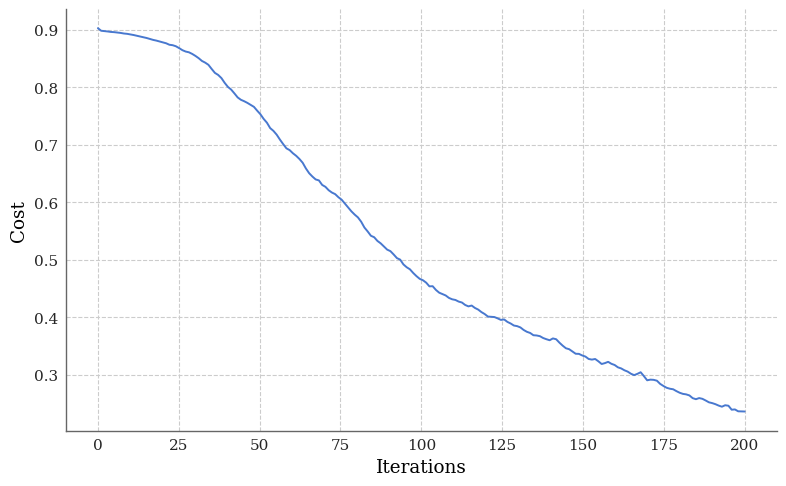

In [28]:
print("Test data:")
x_test = (np.array(x_test_data) / 255).reshape(len(x_test_data), 28*28, 1)
format = lambda x : np.array([1 if i == x else 0 for i in range(10)]).reshape(10, 1)
y_test = np.array([format(y) for y in y_test_data])

def get_accuracy(network, x_data, y_data):
    """Returns accuracy and cost of the model on the given data."""
    out = net.run_batch(x_data)
    cost = np.sum((out - y_data)**2 + reg/2 * y_data) / len(x_data)
    
    correct = 0
    for x, y in zip(out, y_data):
        if np.argmax(x) == np.argmax(y):
            correct += 1
    acc = correct / len(x_data)
    
    return acc, cost

acc, cost = get_accuracy(net, x_test, y_test)
print(f"    Accuracy: {100 * acc: .3f}%")
print(f"    Cost: {cost : .5f}")

fig, ax = plt.subplots()
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.plot(np.linspace(0, len(costs), num=len(costs)), costs)

I left this thing training for just under 10 minutes (each epoch took about ~3 secs), and it got to 87% accuracy in that time. Not quite what 3b1b got to, but it's pretty easy to see that we could've gone higher if we let the AI train for longer. And that's not accounting for a lot of possibilities for optimizations here: running batches could be done with matrix multiplication instead of running each pattern separately, for example. We could also implement train many batches at once with multi-threading. And I didn't even mess with hyperparameters much.

These are all things that are optimized in most AI libraries like Keras, though, so you usually don't need to worry too hard about them. At worst you'll have to tell them what kind of optimization you want, since there's usually many ways to optimize the same thing.

But that's about it! We have an AI that can identify numbers from 0 to 9, 9 out of 10 times now. Cool